# Object Dection

### Confirming GPU Connection

In [1]:
!nvidia-smi

Sat Feb  7 18:17:53 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


### Installing Dependencies

In [3]:
!pip install -q ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.3 MB/s eta 0:00:00


### Imports

In [4]:
from roboflow import Roboflow
from google.colab import userdata
from IPython.display import Image
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### Pull the dataset

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

# project = rf.workspace("third-year-project-1jb5c").project("football-players-detection-3zvbc-xrpzv")
# version = project.version(2)
project = rf.workspace("third-year-project-1jb5c").project("football-updated-2024")
version = project.version(2)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Football-updated-2024-2 in yolov8:: 100%|██████████| 1548/1548 [00:00<00:00, 2633.31it/s]


In [6]:
import os, glob, yaml, random

print("Dataset location:", dataset.location)
yaml_path = os.path.join(dataset.location, "data.yaml")
print("data.yaml:", yaml_path)

with open(yaml_path, "r") as f:
    data = yaml.safe_load(f)

print("\nClass names:", data.get("names"))
print("Num classes:", data.get("nc"))

# Count images
for split in ["train", "valid", "test"]:
    imgs = glob.glob(os.path.join(dataset.location, split, "images", "*"))
    print(split, "images:", len(imgs))


Dataset location: /content/datasets/Football-updated-2024-2
data.yaml: /content/datasets/Football-updated-2024-2/data.yaml

Class names: ['Ball', 'Goalkeeper', 'Player', 'Referee']
Num classes: 4
train images: 618
valid images: 75
test images: 75


**NOTE:** Update `data.yaml` structure to align with the latest requirements of the `ultralytics` package.

In [7]:
!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

### Custom Training

In [8]:
%cd {HOME}

# !yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml batch=4 epochs=50 imgsz=1280 plots=True
model = YOLO("yolov8m.pt")
model.train(
    data=f"{dataset.location}/data.yaml",
    batch=4,
    epochs=50,
    imgsz=1280,
    plots=True
)

/content
Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/Football-updated-2024-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=T

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x790d510b37d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml			 results.csv	      val_batch0_labels.jpg
BoxF1_curve.png			 results.png	      val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
BoxR_curve.png			 train_batch2.jpg     val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch6200.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch6201.jpg  weights
labels.jpg			 train_batch6202.jpg


/content


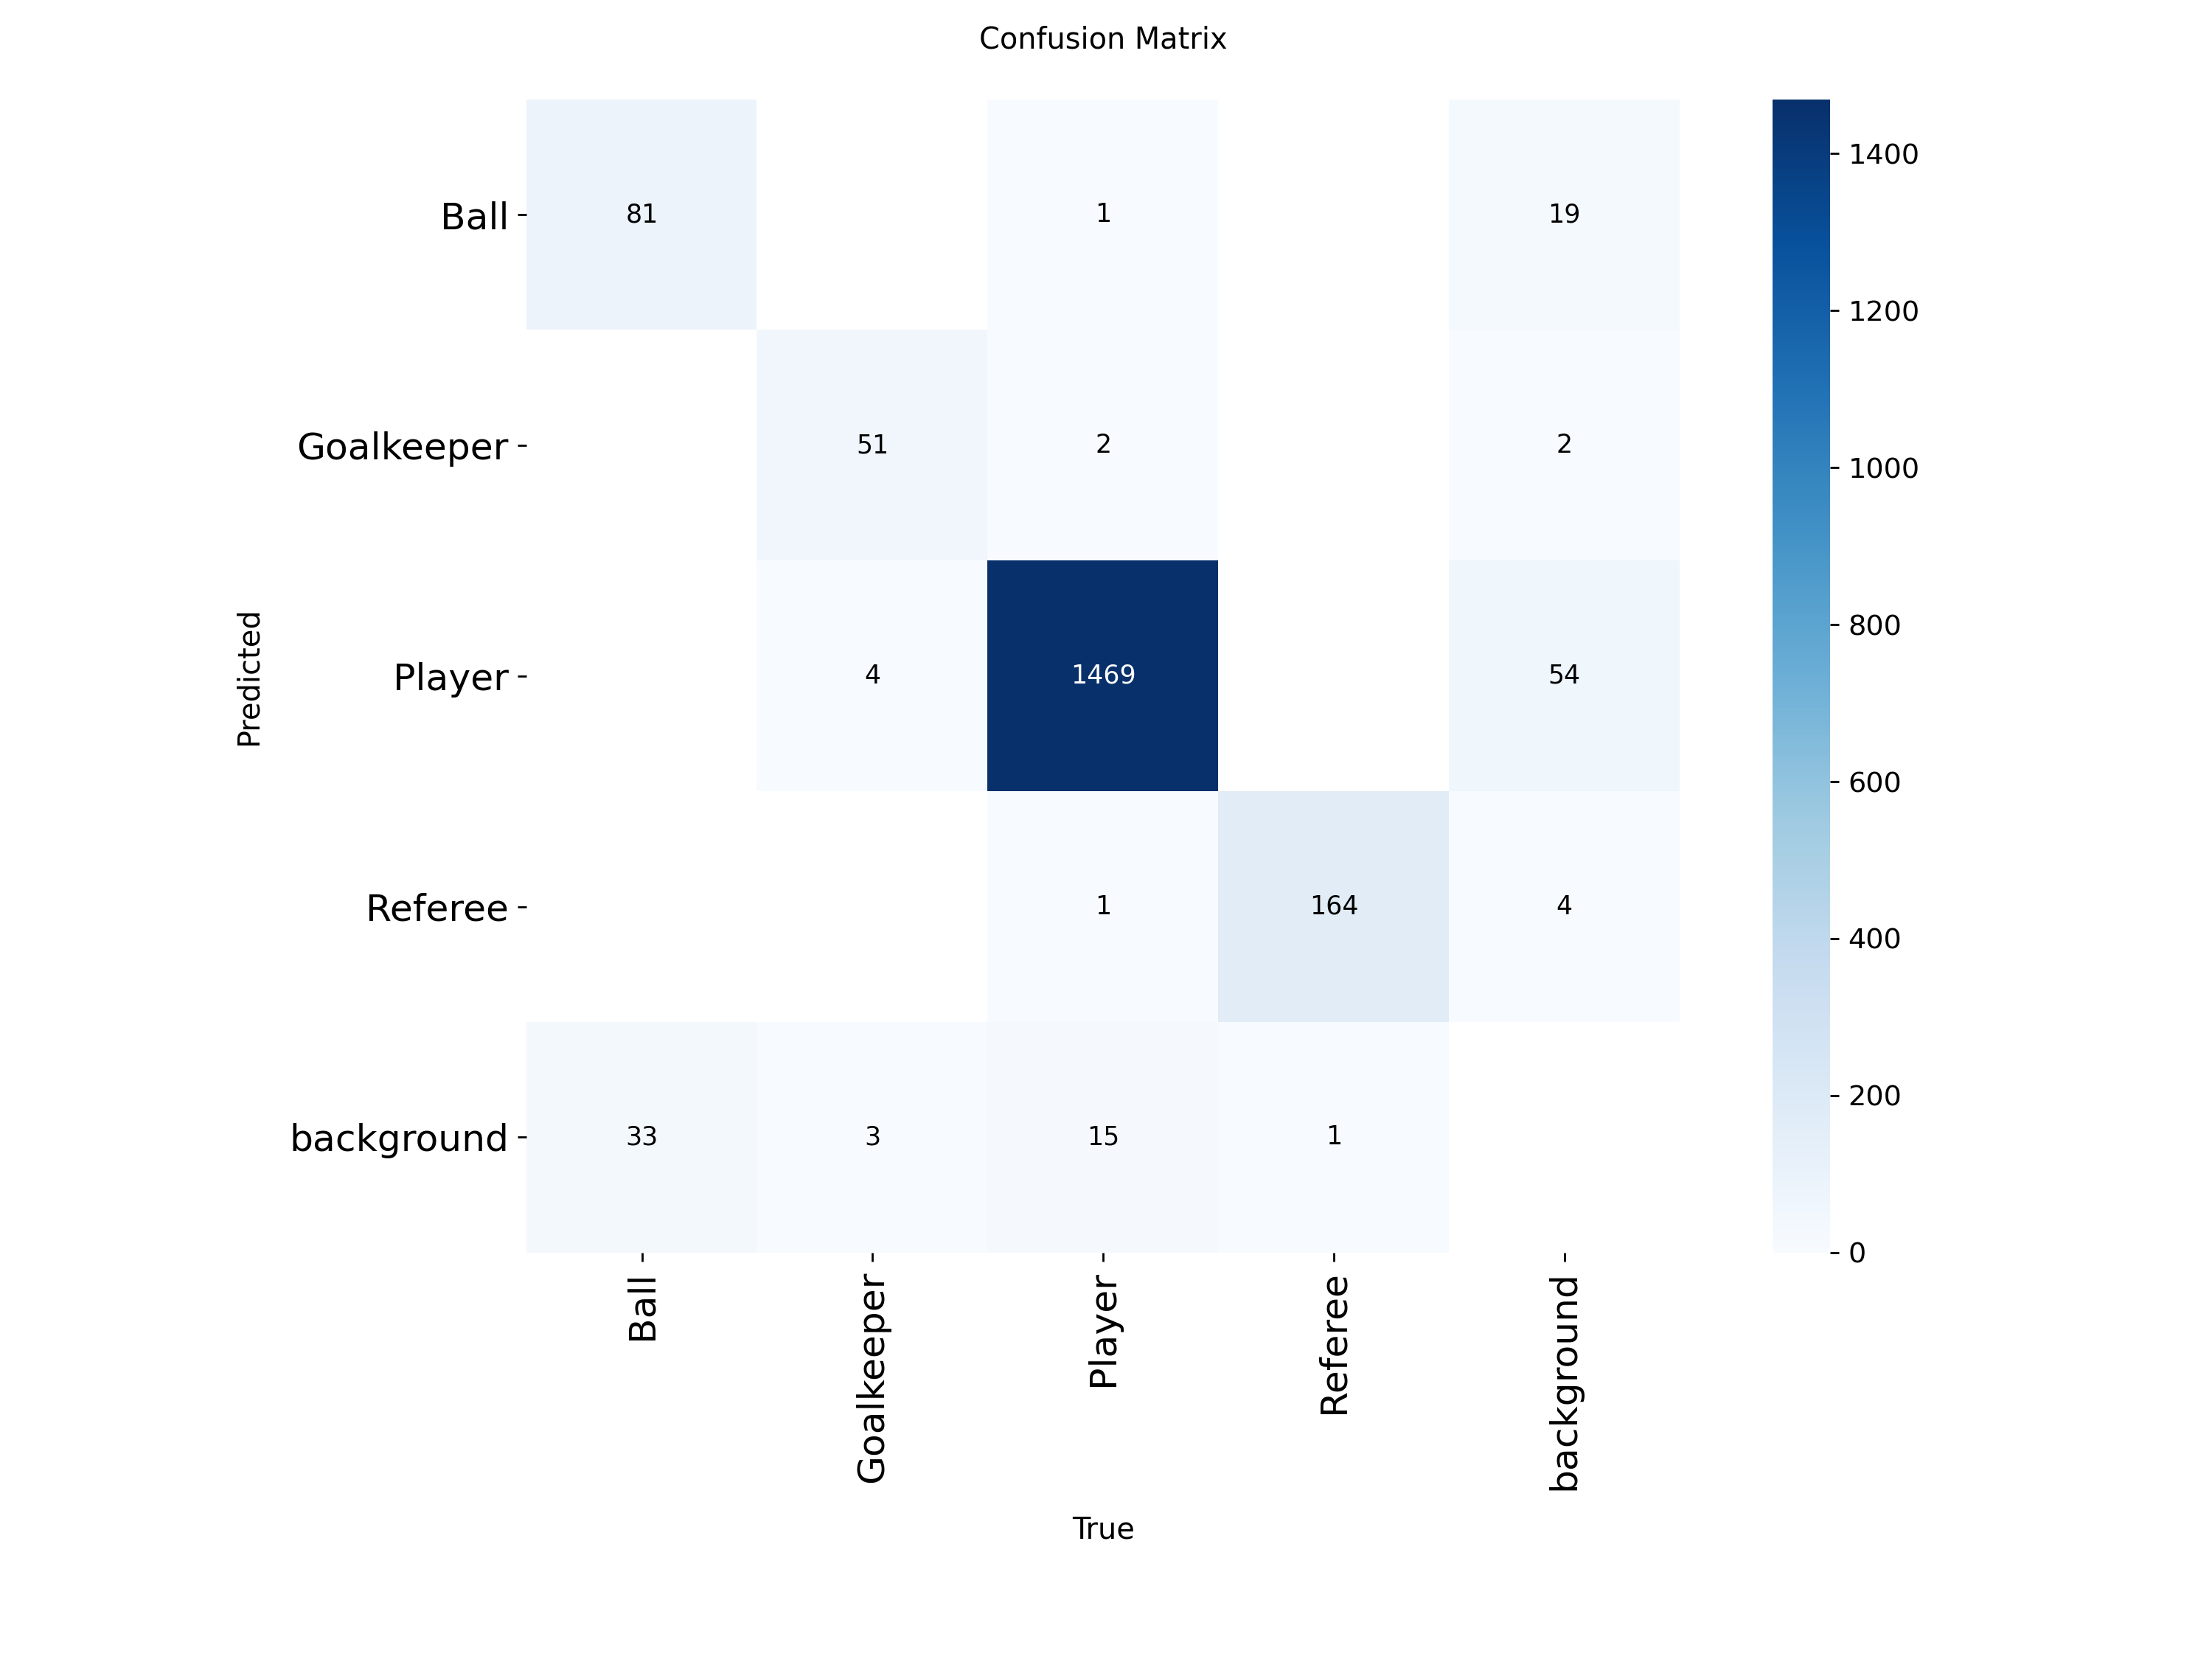

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


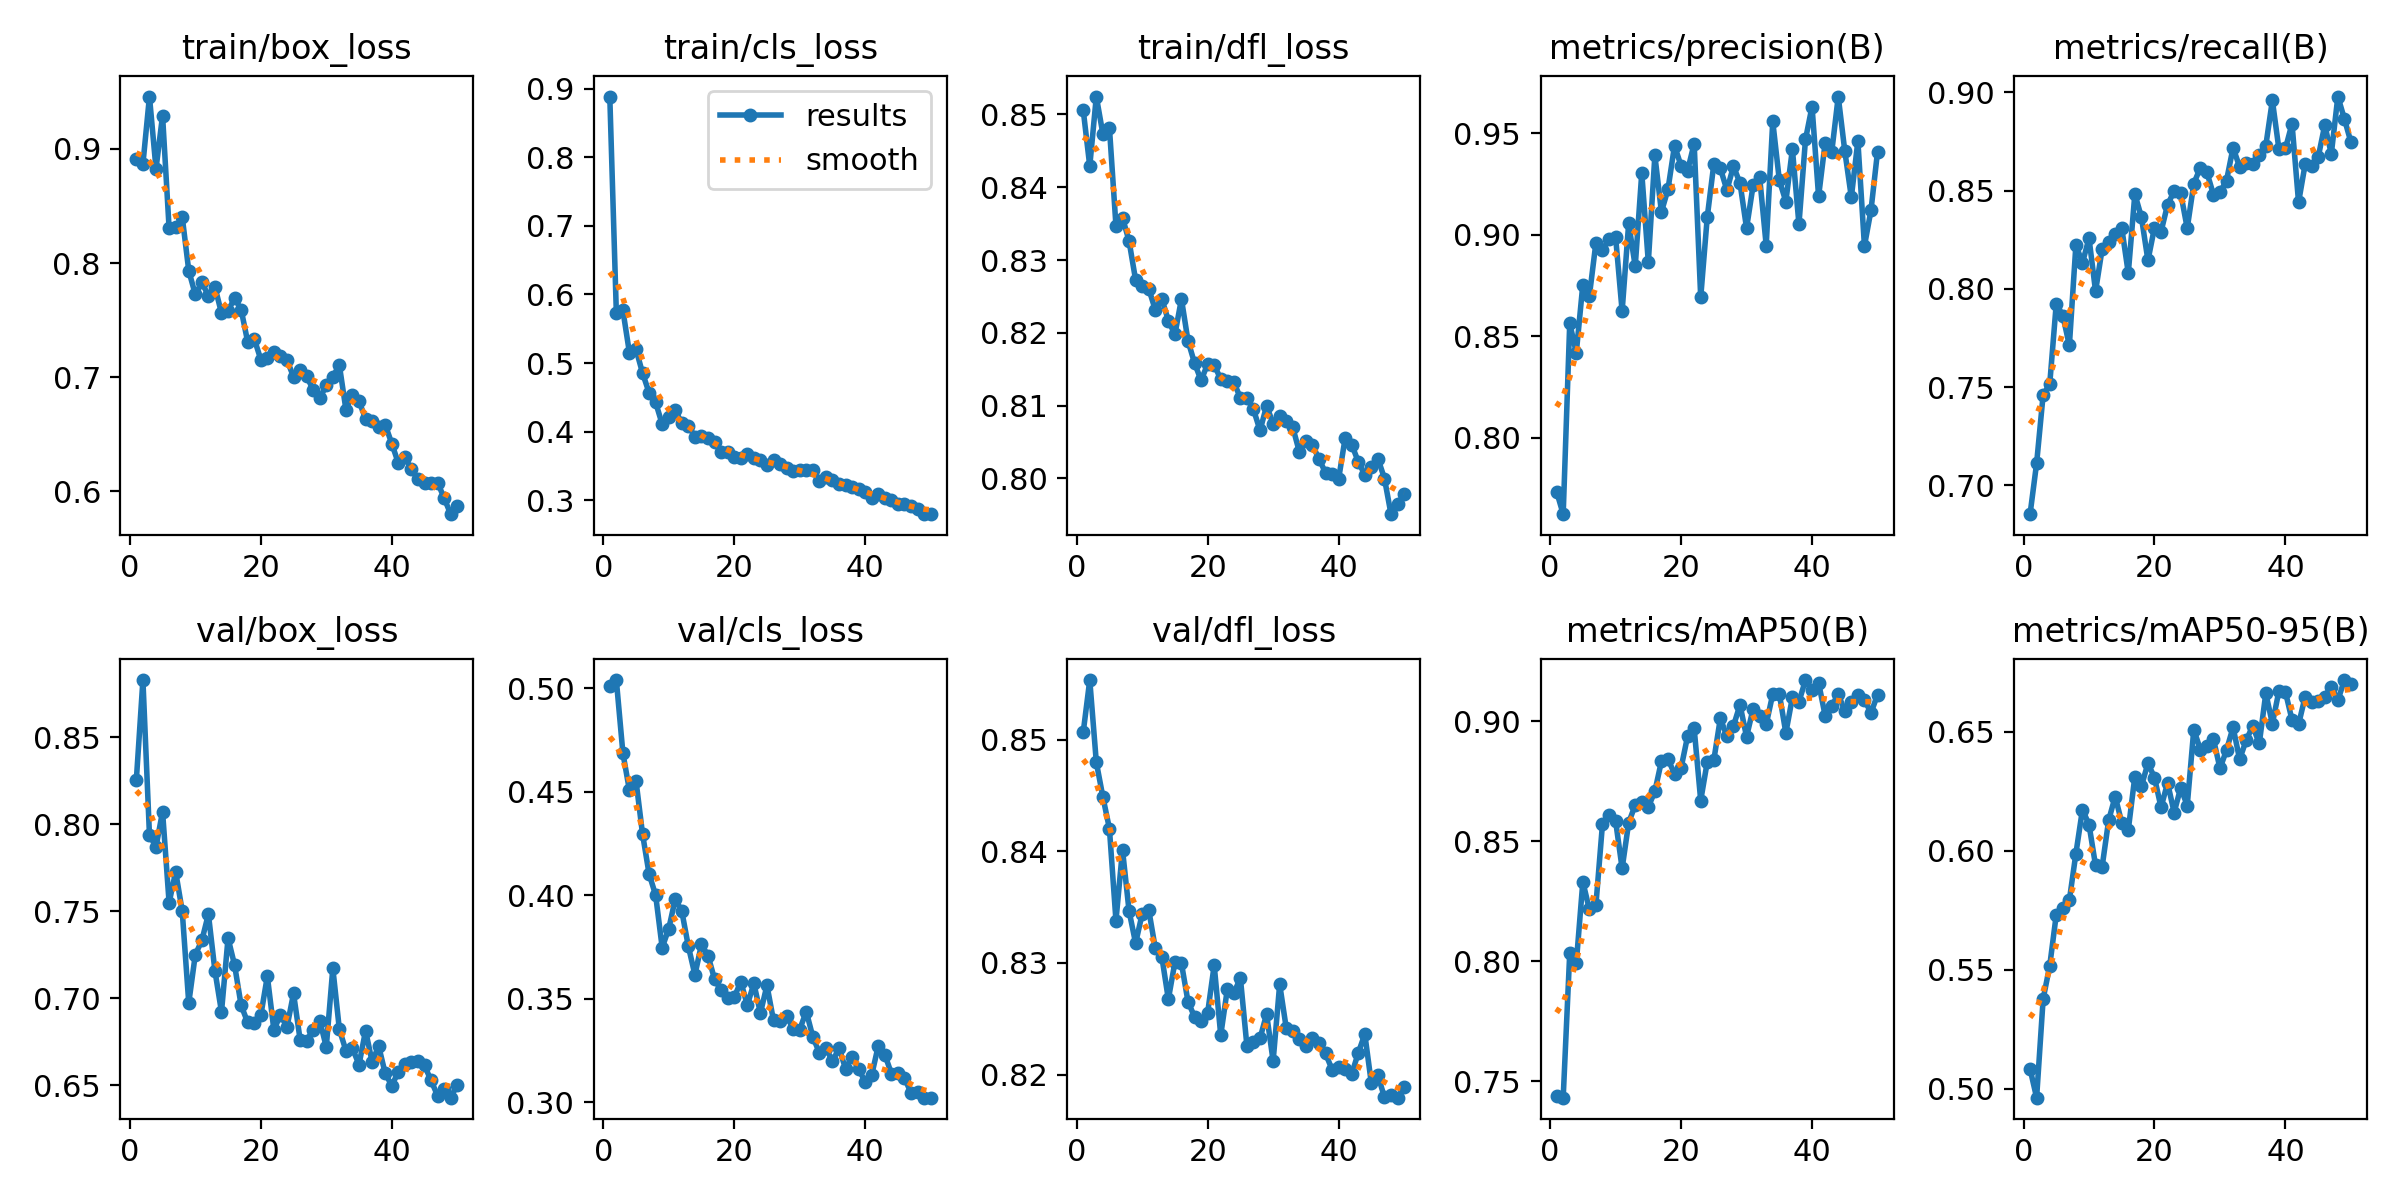

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


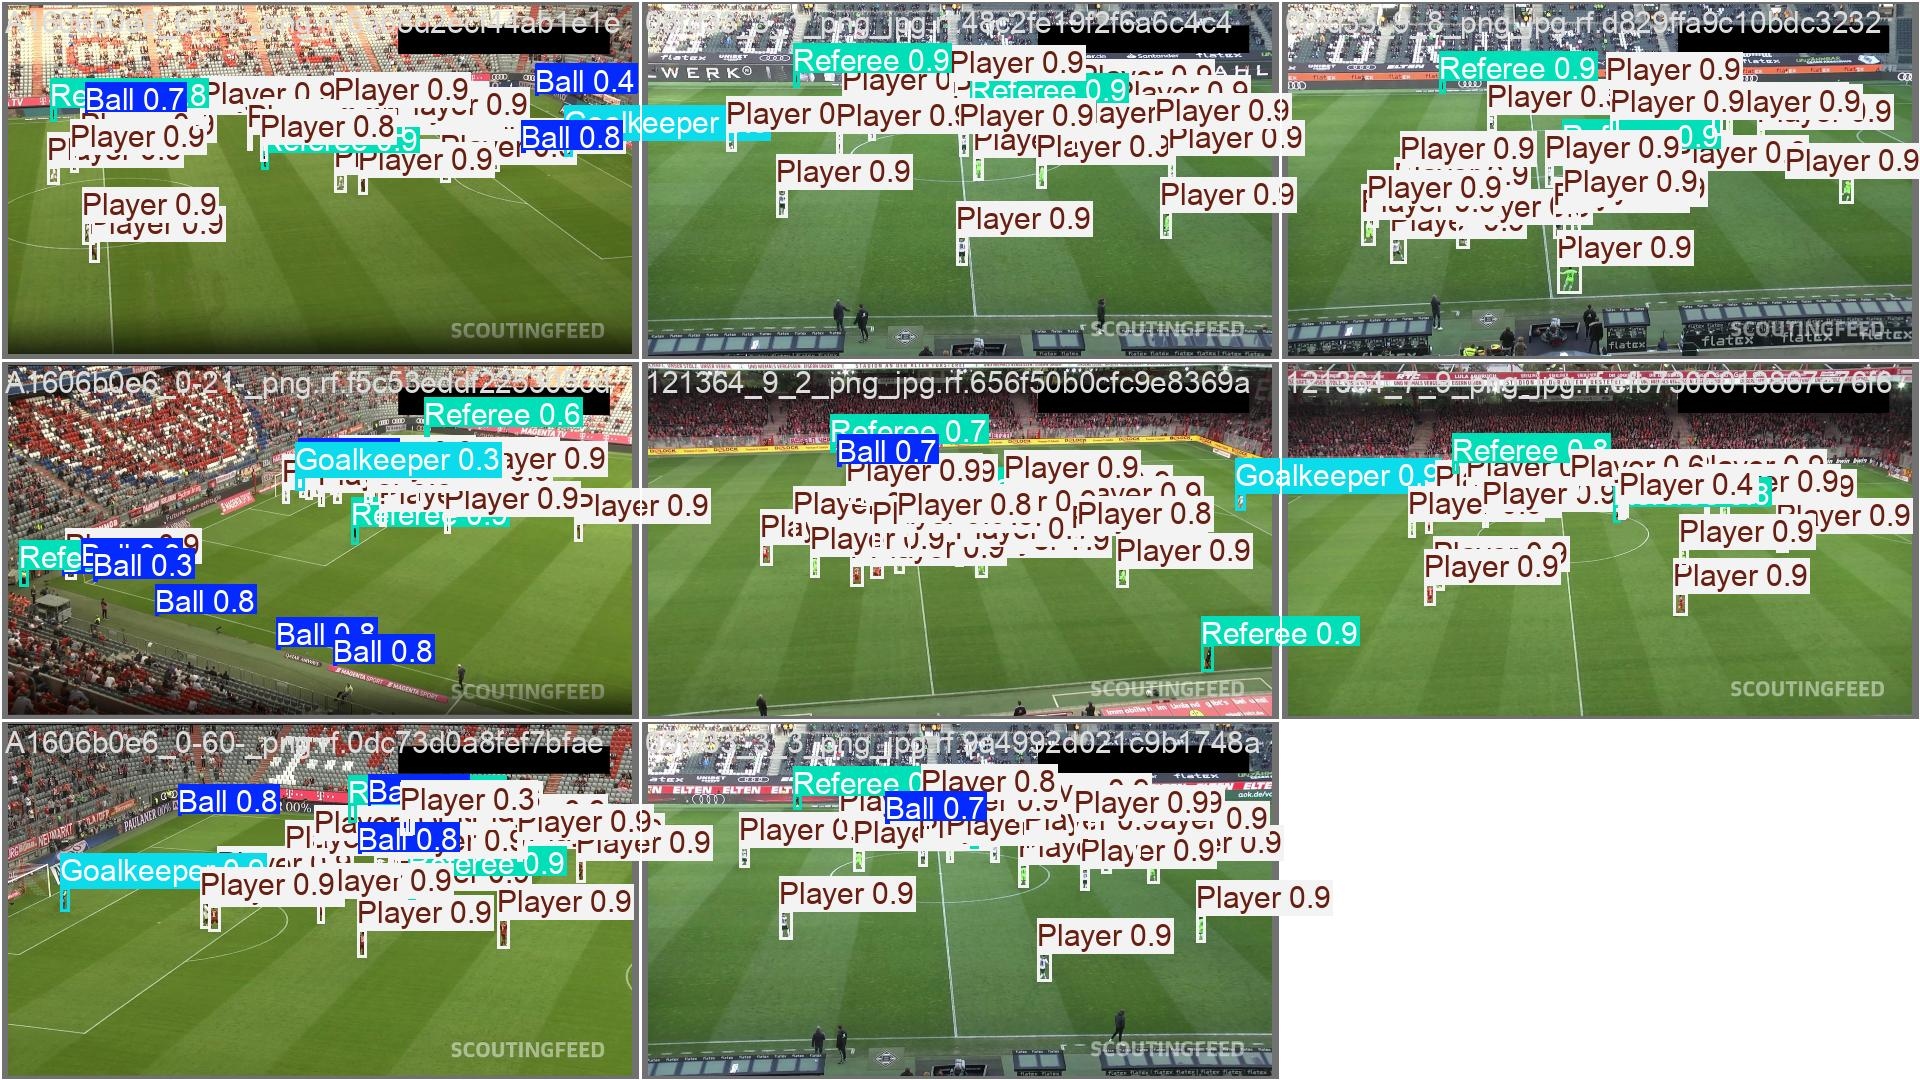

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate custom model

In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml imgsz=1280

/content
Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 93 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3364.5±1008.5 MB/s, size: 232.0 KB)
val: Scanning /content/datasets/Football-updated-2024-2/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 75/75 14.3Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 1.5s/it 7.5s
                   all         75       1825      0.914      0.887      0.906      0.688
                  Ball         64        114      0.776      0.669      0.685      0.371
            Goalkeeper         52         58      0.945      0.897      0.954      0.732
                Player         75       1488      0.969      0.989      0.994      0.859
               Referee         75        165      0.967      0.994      0.993      0.791
Speed: 12.3ms pre

## Test custom model

In [16]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml split=test imgsz=1280

Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 93 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 112.5±28.2 MB/s, size: 343.4 KB)
val: Scanning /content/datasets/Football-updated-2024-2/test/labels... 75 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 75/75 446.8it/s 0.2s
val: New cache created: /content/datasets/Football-updated-2024-2/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 1.9s/it 9.5s
                   all         75       1875      0.896      0.826      0.839      0.627
                  Ball         75        145      0.748      0.372       0.42      0.162
            Goalkeeper         52         58      0.926      0.948      0.965       0.81
                Player         75       1498       0.99      0.993      0.994      0.823
               Referee         75        

## Deploy model on Roboflow

In [15]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.4.12, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/third-year-project-1jb5c/football-updated-2024/2
Share your model with the world at: https://universe.roboflow.com/third-year-project-1jb5c/football-updated-2024/model/2
